In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings("ignore")
import plotly.express as px

In [2]:
df=pd.read_csv("myntra_dataset_ByScraping.csv")

In [3]:
df.head()

brand_name           pants_description   price     MRP  \
0           WROGN  Men Loose Fit Cotton Jeans  1374.0  2499.0   
1  Flying Machine          Men Slim Fit Jeans  1829.0  2999.0   
2        Roadster       Men Pure Cotton Jeans   974.0  2499.0   
3      Bene Kleed     Relaxed Fit Denim Jeans   873.0  2299.0   
4           Levis      Men 511 Slim Fit Jeans  1478.0  2899.0   

   discount_percent  ratings  number_of_ratings  
0              0.45      4.2               57.0  
1              0.39      4.6                5.0  
2              0.61      3.6             1100.0  
3              0.62      4.0             4800.0  
4              0.49      4.3              264.0

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  float64
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB
None


In [5]:
print(df.shape)

(52120, 7)


In [6]:
print(df.isnull().sum())

brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64


In [7]:
print(df.columns)

Index(['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')


In [8]:
print(df.describe().T)

                     count         mean          std     min     25%     50%  \
price              52120.0  1594.515445  1495.972325  337.00   989.0  1439.0   
MRP                52120.0  3180.398438  2201.883218  499.00  2499.0  2999.0   
discount_percent   52120.0     1.648256     4.687529    0.02     0.4     0.5   
ratings            52120.0     3.997794     0.420404    1.00     3.8     4.0   
number_of_ratings  52120.0    91.568937   433.918513    5.00    16.0    35.0   

                       75%      max  
price              1829.00  54000.0  
MRP                3499.00  72000.0  
discount_percent      0.63     64.0  
ratings               4.20      5.0  
number_of_ratings    74.00  30700.0  


In [9]:
print(df["brand_name"].value_counts())

brand_name
WROGN                        5303
Flying Machine               5197
United Colors of Benetton    3985
Roadster                     3523
Mufti                        2416
                             ... 
Happy2r                         1
INKD                            1
Bruun & Stengade                1
Nature Casuals                  1
Ed Hardy                        1
Name: count, Length: 417, dtype: int64


In [10]:
df.isnull().sum()/df.shape[0]*100 

brand_name           0.0
pants_description    0.0
price                0.0
MRP                  0.0
discount_percent     0.0
ratings              0.0
number_of_ratings    0.0
dtype: float64

In [11]:
df.corr 

<bound method DataFrame.corr of            brand_name           pants_description   price     MRP  \
0               WROGN  Men Loose Fit Cotton Jeans  1374.0  2499.0   
1      Flying Machine          Men Slim Fit Jeans  1829.0  2999.0   
2            Roadster       Men Pure Cotton Jeans   974.0  2499.0   
3          Bene Kleed     Relaxed Fit Denim Jeans   873.0  2299.0   
4               Levis      Men 511 Slim Fit Jeans  1478.0  2899.0   
...               ...                         ...     ...     ...   
52115      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   
52116        HERE&NOW          Men Slim Fit Jeans   759.0  1899.0   
52117      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   
52118           Celio      Men Straight Fit Jeans   759.0  1899.0   
52119      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   

       discount_percent  ratings  number_of_ratings  
0                  0.45      4.2               57.0  
1                  0.39      4.

In [12]:
df["brand_name"].unique() 

array(['WROGN', 'Flying Machine', 'Roadster', 'Bene Kleed', 'Levis',
       'HERE&NOW', 'Urbano Fashion', 'styzon', 'Calvin Klein Jeans',
       'HIGHLANDER', 'Kotty', 'Mast & Harbour', 'Mufti', 'FUGAZEE',
       'The Indian Garage Co', 'French Connection', 'glitchez',
       'Thomas Scott', 'V-Mart', 'Nautica', 'MASTERLY WEFT', 'Sztori',
       'TURMS', 'Red Tape', 'Stylecast X Kotty', 'MAAHIT', 'FUDE PRIDE',
       'StyleCast x Revolte', 'Style Quotient', 'Being Human',
       'Peter England Casuals', 'bigbanana', 'PARIS HAMILTON',
       'Dennis Lingo', 'RIG BONE', 'ASHTOM', 'FOUL CHILD', 'max',
       'SPYKAR', 'DENIMLOOK', 'Snitch', 'MASCLN SASSAFRAS',
       'Kook N Keech', 'Playfeel', 'Ducati', 'me Queen', 'Campus Sutra',
       'STUDIO NEXX', 'Powerlook', 'Cantabil', 'Aeropostale',
       'SF JEANS by Pantaloons', 'FCUK',
       'Hardsoda by The Indian Garage Co', 'Kolor Fusion',
       'W.T.F - Witnessing True Fashion', 'Moda Rapido', 'Bewakoof',
       'High Star', 'Beyoung',

In [13]:
df["brand_name"].nunique()  

417

In [14]:
df.columns  

Index(['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')

In [15]:
d1=df["discount_percent"].value_counts()    

In [16]:
r1=df["ratings"].value_counts()     

In [17]:
gr=df.groupby(["brand_name", "ratings"])["discount_percent"].mean().unstack()
gr

ratings            1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  ...  \
brand_name                                                           ...   
7 For All Mankind  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
7OUNCE             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
AD By Arvind       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
ADBUCKS            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
ADIDAS Originals   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
mode de base       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
nostrum            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
prochain           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
styzon             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
the Misnomer       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

ratings                  4.1        4.2       4.3    4.4    4.5        4.6  \
brand_name                                                                   
7 For All Mankind   0.400000   0.425000  0.500000    NaN    NaN   0.433333   
7OUNCE                   NaN        NaN  0.556667    NaN    NaN        NaN   
AD By Arvind        0.297500   0.363182  0.472857   0.40   0.10   0.354000   
ADBUCKS            15.000000  13.000000       NaN  15.00    NaN        NaN   
ADIDAS Originals         NaN   0.600000       NaN    NaN    NaN        NaN   
...                      ...        ...       ...    ...    ...        ...   
mode de base             NaN  26.343333       NaN  26.01  28.01  23.010000   
nostrum             0.590000   0.700000  0.490000    NaN    NaN   0.390000   
prochain                 NaN        NaN  0.600000    NaN    NaN        NaN   
styzon              0.583333   0.401875  0.490000   0.73   0.50   0.399167   
the Misnomer             NaN        NaN  0.490000    NaN    NaN        NaN   

ratings            4.7   4.8   4.9    5.0  
brand_name                                 
7 For All Mankind  NaN   NaN   NaN    NaN  
7OUNCE             NaN   NaN   NaN    NaN  
AD By Arvind       NaN  0.57  0.57    NaN  
ADBUCKS            NaN   NaN   NaN    NaN  
ADIDAS Originals   NaN   NaN   NaN    NaN  
...                ...   ...   ...    ...  
mode de base       NaN   NaN   NaN  26.01  
nostrum            NaN   NaN   NaN   0.38  
prochain           NaN   NaN   NaN    NaN  
styzon             NaN  0.50   NaN    NaN  
the Misnomer       NaN   NaN   NaN    NaN  

[417 rows x 41 columns]

In [18]:
df.columns

Index(['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')

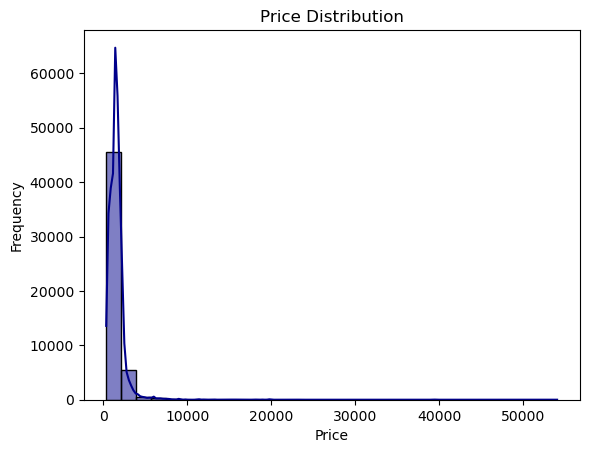

In [19]:
sns.histplot(x="price", data=df, bins=30, kde=True, color="darkblue")
plt.title("Price Distribution")  
plt.xlabel("Price") 
plt.ylabel("Frequency") 
plt.show()

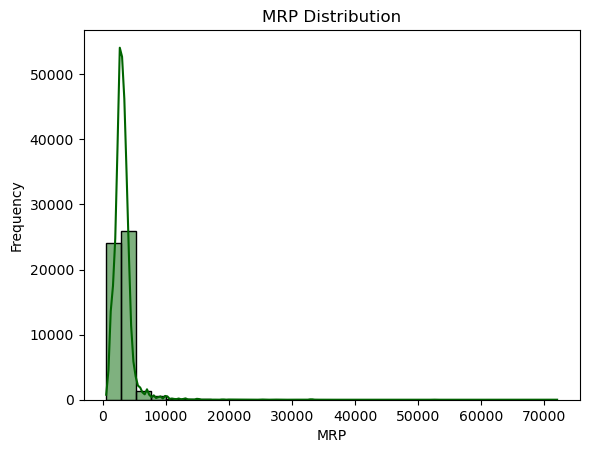

In [20]:
sns.histplot(x="MRP", data=df, bins=30, kde=True, color="darkgreen")
plt.title("MRP Distribution")
plt.xlabel("MRP")
plt.ylabel("Frequency")
plt.show() 

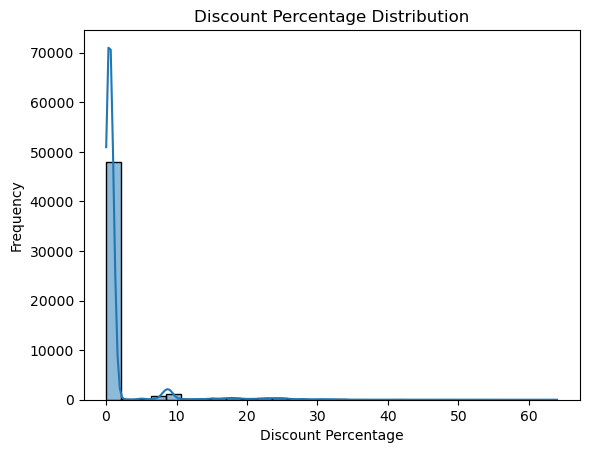

In [21]:
sns.histplot(x="discount_percent", data=df, bins=30, kde=True)
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

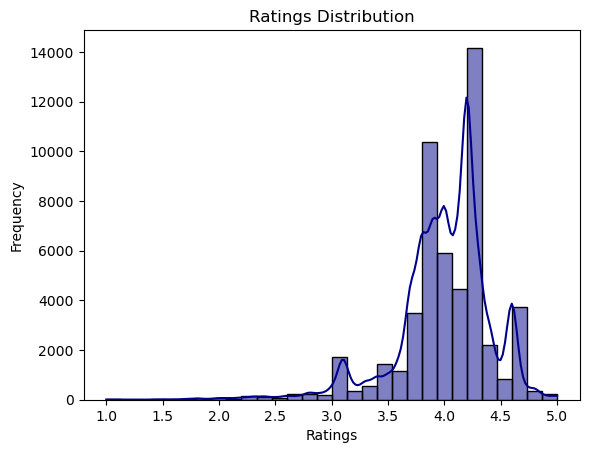

In [22]:
sns.histplot(x="ratings", data=df, bins=30, kde=True, color="darkblue")
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

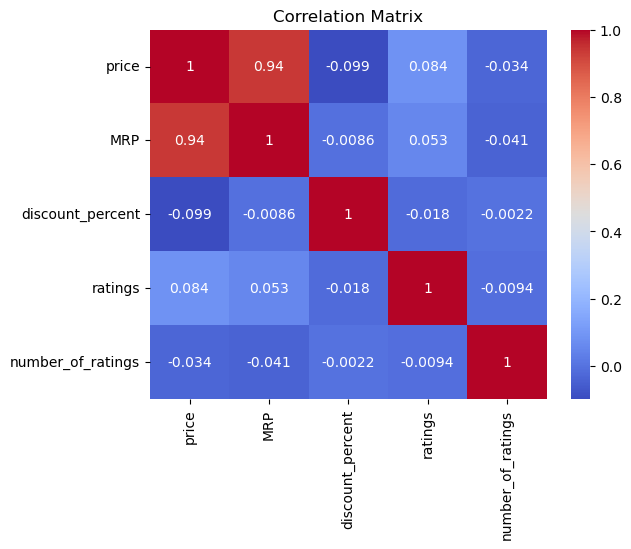

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

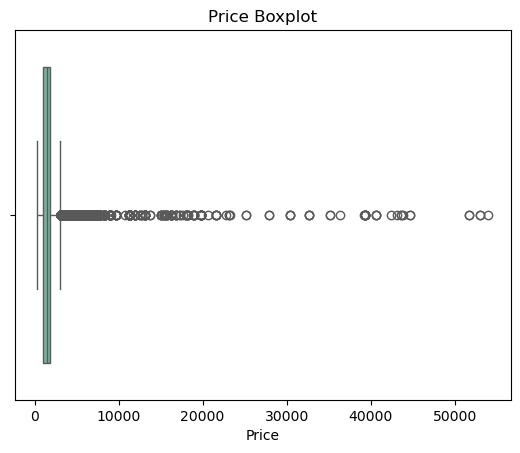

In [24]:
sns.boxplot(x="price", data=df, palette="Set2")
plt.title("Price Boxplot")
plt.xlabel("Price")
plt.show()


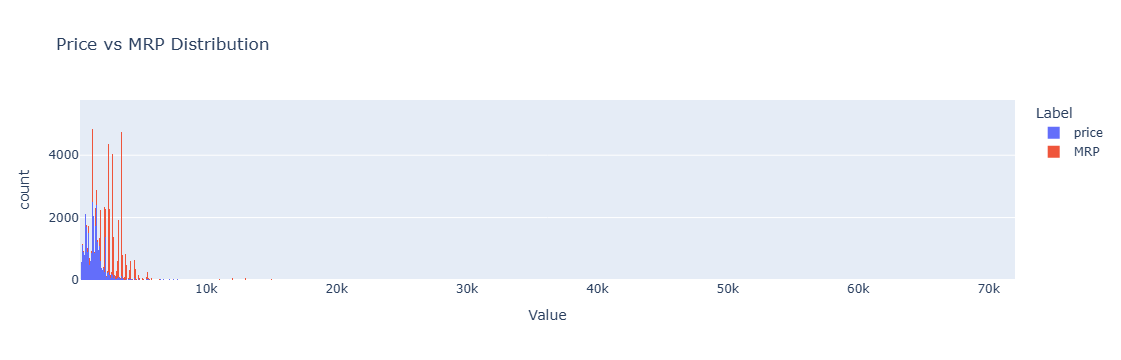

In [25]:
df_melted = df.melt(value_vars=["price", "MRP"], var_name="Label", value_name="Value")
px.histogram(df_melted, x="Value", color="Label", title="Price vs MRP Distribution").show()

In [26]:
import plotly.express as px
px.histogram(df, x="price", color="brand_name").show()

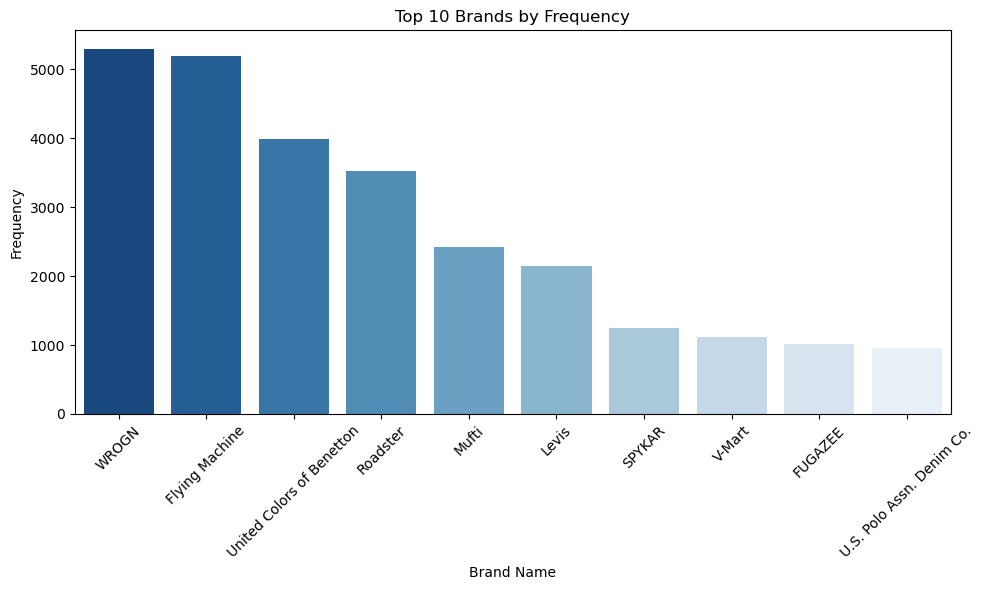

In [27]:
top_10_brands = df["brand_name"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette="Blues_r")
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Brand Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df.head()

brand_name           pants_description   price     MRP  \
0           WROGN  Men Loose Fit Cotton Jeans  1374.0  2499.0   
1  Flying Machine          Men Slim Fit Jeans  1829.0  2999.0   
2        Roadster       Men Pure Cotton Jeans   974.0  2499.0   
3      Bene Kleed     Relaxed Fit Denim Jeans   873.0  2299.0   
4           Levis      Men 511 Slim Fit Jeans  1478.0  2899.0   

   discount_percent  ratings  number_of_ratings  
0              0.45      4.2               57.0  
1              0.39      4.6                5.0  
2              0.61      3.6             1100.0  
3              0.62      4.0             4800.0  
4              0.49      4.3              264.0

In [29]:
for col in df.select_dtypes("object"):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [30]:
df

brand_name  pants_description   price     MRP  discount_percent  \
0             391               1168  1374.0  2499.0              0.45   
1             130               1802  1829.0  2999.0              0.39   
2             300               1520   974.0  2499.0              0.61   
3              49               2426   873.0  2299.0              0.62   
4             210                392  1478.0  2899.0              0.49   
...           ...                ...     ...     ...               ...   
52115         269               1802   759.0  1899.0              0.60   
52116         149               1802   759.0  1899.0              0.60   
52117         269               1802   759.0  1899.0              0.60   
52118          81               1945   759.0  1899.0              0.60   
52119         269               1802   759.0  1899.0              0.60   

       ratings  number_of_ratings  
0          4.2               57.0  
1          4.6                5.0  
2          3.6             1100.0  
3          4.0             4800.0  
4          4.3              264.0  
...        ...                ...  
52115      4.0               63.0  
52116      4.0               63.0  
52117      4.0               63.0  
52118      4.0               63.0  
52119      4.0               63.0  

[52120 rows x 7 columns]

In [31]:
df["rating_class"] = df["ratings"].apply(lambda x: 1 if x >= 4 else 0)
df

brand_name  pants_description   price     MRP  discount_percent  \
0             391               1168  1374.0  2499.0              0.45   
1             130               1802  1829.0  2999.0              0.39   
2             300               1520   974.0  2499.0              0.61   
3              49               2426   873.0  2299.0              0.62   
4             210                392  1478.0  2899.0              0.49   
...           ...                ...     ...     ...               ...   
52115         269               1802   759.0  1899.0              0.60   
52116         149               1802   759.0  1899.0              0.60   
52117         269               1802   759.0  1899.0              0.60   
52118          81               1945   759.0  1899.0              0.60   
52119         269               1802   759.0  1899.0              0.60   

       ratings  number_of_ratings  rating_class  
0          4.2               57.0             1  
1          4.6                5.0             1  
2          3.6             1100.0             0  
3          4.0             4800.0             1  
4          4.3              264.0             1  
...        ...                ...           ...  
52115      4.0               63.0             1  
52116      4.0               63.0             1  
52117      4.0               63.0             1  
52118      4.0               63.0             1  
52119      4.0               63.0             1  

[52120 rows x 8 columns]

In [32]:
X = df.drop(["rating_class", "ratings"], axis=1)
y = df["rating_class"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "BaggingClassifier": BaggingClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(random_state=42),
    "XGBClassifier": XGBClassifier()
}

# Modelleri eğitme ve değerlendirme (Train and evaluate models)
all_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    print(classification_report(y_test, y_predict))
    print(f1)
    scores = {"Model": name, "Accuracy": accuracy, "F1": f1}
    all_scores.append(scores)


              precision    recall  f1-score   support

           0       0.43      0.08      0.13      5119
           1       0.61      0.93      0.74      7911

    accuracy                           0.60     13030
   macro avg       0.52      0.50      0.44     13030
weighted avg       0.54      0.60      0.50     13030

0.7367157009906935
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5119
           1       0.84      0.87      0.86      7911

    accuracy                           0.82     13030
   macro avg       0.82      0.81      0.81     13030
weighted avg       0.82      0.82      0.82     13030

0.8558081594518842
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      5119
           1       0.86      0.84      0.85      7911

    accuracy                           0.82     13030
   macro avg       0.81      0.81      0.81     13030
weighted avg       0.82      0.82   

  File "C:\Users\Rooknight\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Rooknight\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rooknight\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rooknight\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


              precision    recall  f1-score   support

           0       0.80      0.72      0.76      5119
           1       0.83      0.88      0.86      7911

    accuracy                           0.82     13030
   macro avg       0.81      0.80      0.81     13030
weighted avg       0.82      0.82      0.82     13030

0.8551673499357523
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      5119
           1       0.83      0.88      0.86      7911

    accuracy                           0.82     13030
   macro avg       0.82      0.80      0.81     13030
weighted avg       0.82      0.82      0.82     13030

0.8560899207665377


                        Model  Accuracy        F1
1      RandomForestClassifier  0.822333  0.855808
6               XGBClassifier  0.820184  0.856090
7               XGBClassifier  0.820184  0.856090
5              LGBMClassifier  0.818342  0.855167
2           BaggingClassifier  0.816117  0.847038
3  GradientBoostingClassifier  0.806600  0.847642
4               MLPClassifier  0.715656  0.788588
0          LogisticRegression  0.596163  0.736716


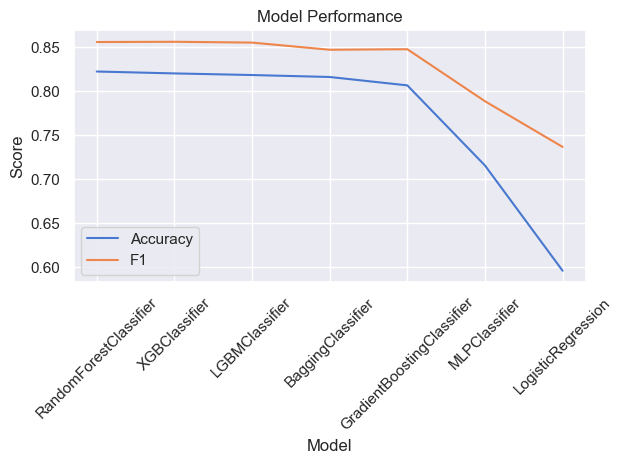

In [37]:
df_scores = pd.DataFrame(all_scores).sort_values(by="Accuracy", ascending=False)
print(df_scores)

# Sonuçları görselleştirme (Visualize results)
sns.set(style="darkgrid", palette="muted")

sns.lineplot(x="Model", y="Accuracy", data=df_scores, label="Accuracy")
sns.lineplot(x="Model", y="F1", data=df_scores, label="F1")
plt.title("Model Performance")  # Grafik başlığı (Chart title)
plt.xlabel("Model")  # X ekseni etiketi (X-axis label)
plt.ylabel("Score")  # Y ekseni etiketi (Y-axis label)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()